<Figure size 576x576 with 0 Axes>

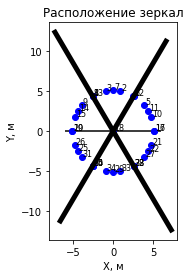

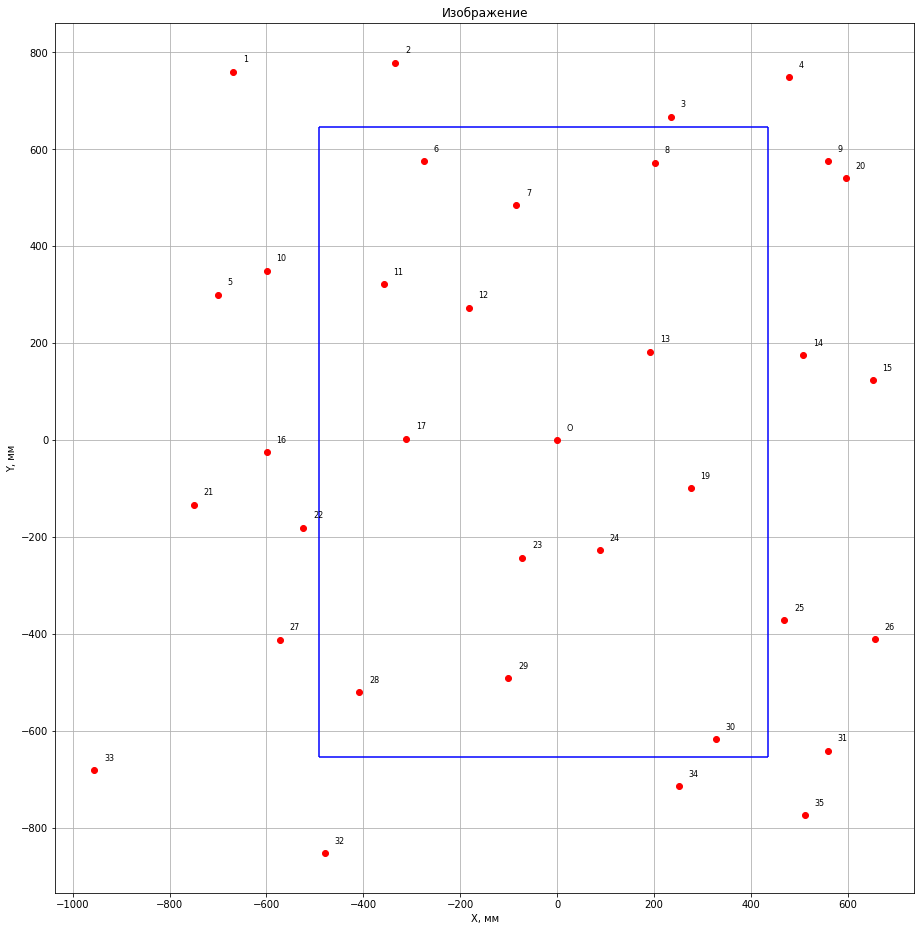

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import matplotlib.patches
import matplotlib.lines
import matplotlib.path
import math

#def my_line(x_min, y_min, intercept):
#    """Plot a line from slope and intercept"""
#    axes = plt.gca()
#    x_vals = np.array(axes.get_xlim())
#    y_vals = intercept + slope * x_vals
#    plt.plot(x_vals, y_vals, '-', color='black', linewidth='5')

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black', linewidth='5')
#===========================================================================
#=Задаем массивы: 1) с координатами зеркал, 2) с координатами изображений ==
#===========================================================================
u, d, r, l = 645, -655, 436, -492
#===========================================================================
results = {"Mirror": [], "X-coord": [], "Y-coord": []}
results["Mirror"] = np.array(["O", 33, 34, 35, 31, 30, 29, 28, 27, 32, 21, 22, 16, 17, 11, 10, 12, 5, 6, 1, 2, 7, 8, 3, 4, 9, 15, 14, 20, 19, 13, 25, 26, 24, 23])
results["X-coord"] = np.array([0, l-463, r-185, r+76, r+122, r-108, l+391, l+84, l-80, l+13, l-258, l-32, l-107, l+181, l+134, l-107, l+309, l-209, l+217, l-177, l+158, l+408, r-235, r-201, r+43, r+122, r+215, r+72, r+160, r-160, r-244, r+33, r+220, r-348, l+420])
results["Y-coord"] = np.array([0, d-27, d-60, d-120, d+14, d+37, d+163, d+134, d+243, d-198, d+521, d+474, d+630, d+658, u-323, u-296, u-372, u-345, u-70, u+115, u+134, u-160, u-73, u+22, u+104, u-70, u-522, u-470, u-105, u-745, u-463, d+283, d+244, d+427, d+412])
pd_results = pd.DataFrame(results)
#===========================================================================
mirrors_rphi = {"Mirror": [], "PHI-coord_in_deg": [], "L-coord": []}
mirrors_rphi["Mirror"] = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
mirrors_rphi["PHI-coord_in_deg"] = np.array([60, 80, 100, 120, 40, 60, 90, 120, 140, 20, 30, 60, 120, 150, 160, 0, 0, 0, 180, 180, 340, 330, 300, 240, 210, 200, 320, 300, 270, 240, 220, 300, 280, 260, 240])
mirrors_rphi["L-coord"] = np.array([5.081, 5.077, 5.077, 5.069, 5.079, 5.09, 5.089, 5.083, 5.071, 5.08, 5.09, 5.098, 5.094, 5.088, 5.08, 5.09, 5.098, 0, 5.097, 5.088, 5.078, 5.092, 5.099, 5.098, 5.088, 5.081, 5.083, 5.093, 5.092, 5.09, 5.083, 5.083, 5.08, 5.08, 5.082])
pd_mirrors_rphi = pd.DataFrame(mirrors_rphi)
#===========================================================================
mirrors_xy = {"Mirror": [], "X-coord": [], "Y-coord": []}
mirrors_xy["Mirror"] = mirrors_rphi["Mirror"]
mirrors_xy["X-coord"] = np.zeros(35, dtype=float)
mirrors_xy["Y-coord"] = np.zeros(35, dtype=float)
for i in range (len(mirrors_rphi["Mirror"])):
    mirrors_xy["X-coord"][i] = mirrors_rphi["L-coord"][i]*math.cos(math.radians(mirrors_rphi["PHI-coord_in_deg"][i]))
    mirrors_xy["Y-coord"][i] = mirrors_rphi["L-coord"][i]*math.sin(math.radians(mirrors_rphi["PHI-coord_in_deg"][i]))
pd_mirrors_xy = pd.DataFrame(mirrors_xy)
#===========================================================================
#=============================Рисуем графики================================
#===========================================================================
plt.figure(figsize=(8,8))
figure = plt.subplots(nrows=1, ncols=2)
#plt.figtext(0.5, -0.1, "figtext")
#plt.suptitle("suptitle")
#===========================================================================
#=====================Схема расположения зеркал=============================
#===========================================================================
plt.subplot(121)
plt.subplot(aspect=True)
plt.title("Расположение зеркал")
plt.xlabel("X, м")
plt.ylabel("Y, м")
plt.plot(mirrors_xy["X-coord"], mirrors_xy["Y-coord"], 'o', color='blue')
for i in range (len(mirrors_xy["Mirror"])):
    plt.annotate(mirrors_xy["Mirror"][i], xy=(mirrors_xy["X-coord"][i],mirrors_xy["Y-coord"][i]), xytext=(mirrors_xy["X-coord"][i]+0.1,mirrors_xy["Y-coord"][i]+0.1),fontsize=8)
plt.hlines(0, -6, 6, linestyle='-', colors='black')
abline(1.7, 0)
abline(-1.7, 0)
#plt.show()
#===========================================================================
#=========================График с результатами=============================
#===========================================================================
plt.figure(figsize=(40,16))
plt.subplot(122)
plt.subplot(aspect=True)
plt.title("Изображение")
plt.xlabel("X, мм")
plt.ylabel("Y, мм")
plt.grid(True)
#gridsize=(1,1)
#plt.text(0.5, 0.5, "0, 0")
plt.plot(results["X-coord"], results["Y-coord"], 'o', color='red')
for i in range (len(results["Mirror"])):
    plt.annotate(results["Mirror"][i], xy=(results["X-coord"][i],results["Y-coord"][i]), xytext=(results["X-coord"][i]+20,results["Y-coord"][i]+20),fontsize=8)
plt.hlines(u, l, r, linestyle='-', colors='b')
plt.hlines(d, l, r, linestyle='-', colors='b')
plt.vlines(l, d, u, linestyle='-', colors='b')
plt.vlines(r, d, u, linestyle='-', colors='b')
#===========================================================================
plt.show()

#f.savefig("foo.pdf", bbox_inches='tight')

NameError: name 'mirror_x' is not defined

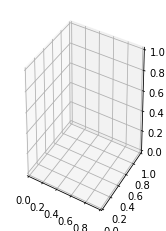

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

ax.scatter(mirror_x, mirror_y, mirror_z, color='r', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax = fig.add_subplot(122, projection='3d')

ax.scatter(mirror_x, mirror_y, mirror_z, color='r', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

-1416 26


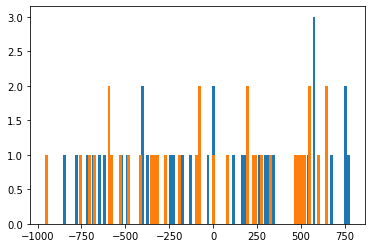

0.7428571428571429 -40.457142857142856 0 -72


In [68]:
import numpy as np
import math
import statistics

n = np.array(exp1['Y_coord'])
m = np.array(exp1['X_coord'])

L = np.array([m,n])

print(sum(L[0]), sum(L[1]))

plt.hist(n,100)
plt.hist(m,100)

plt.show()

print(statistics.mean(exp['Y_coord']), statistics.mean(exp['X_coord']), statistics.median(exp['Y_coord']), statistics.median(exp['X_coord']))

In [98]:
exp = pd.read_csv('/home/yaroslav/Yaroslavus_GitHub/IACT_workshop_experiments/Spot_experiments_results.csv',
                       sep=' ', names=['mirror_number','X_coord','Y_coord','distance_to_focus'])
kb = pd.read_csv('/home/yaroslav/Yaroslavus_GitHub/IACT_workshop_experiments/Mirror_coordinates_and_angles_from_KB.csv',
                       sep=' ', names=['X_coord','Y_coord','Z_coord','alpha (YZ-plane)', 'beta (XZ-plane)'])

all_data = kb
all_data['experiment_x'] = 1
all_data['experiment_y'] = 1
all_data['experiment_d'] = 1

all_data


#for i in range(len(all_data)):
#    all_data[i]['experiment_x'] = exp['X_coord'][i]


print(list(map(lambda x,y:  math.sqrt(y**2 + x**2), all_data['X_coord'][:6], all_data['Y_coord'][:6])))
print()
print(list(map(lambda x,y:  math.sqrt(y**2 + x**2), all_data['X_coord'][6:18], all_data['Y_coord'][6:18])))
print()
print(list(map(lambda x,y:  math.sqrt(y**2 + x**2), all_data['X_coord'][18:36], all_data['Y_coord'][18:36])))


[620.0, 619.9997831937121, 619.9997831937121, 620.0, 619.9997831937121, 619.9997831937121]

[1240.0, 1073.87137551955, 1239.9995663874242, 1073.871, 1239.9995663874242, 1073.87137551955, 1240.0, 1073.87137551955, 1239.9995663874242, 1073.871, 1239.9995663874242, 1073.87137551955]

[1860.0, 1640.3657309149842, 1640.3654850797734, 1859.9997825938044, 1640.3655663445877, 1640.3655663445877, 1859.9997825938044, 1640.3654850797734, 1640.3657309149842, 1860.0, 1640.3657309149842, 1640.3654850797734, 1859.9997825938044, 1640.3655663445877, 1640.3655663445877, 1859.9997825938044, 1640.3654850797734, 1640.3657309149842]


167